https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/
참고해서 볼것

(256, 256)
(256, 256)


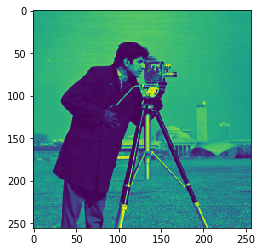

In [38]:
import matplotlib.pyplot as plt
from skimage import io, transform, color
from scipy import ndimage
import numpy as np


fpath = './'
image = io.imread(fpath + 'cameraman.tif')
imageTranslated = numpy.zeros(np.shape(image))
print(imageTranslated.shape)
print(image.shape)
plt.imshow(image)
plt.show()

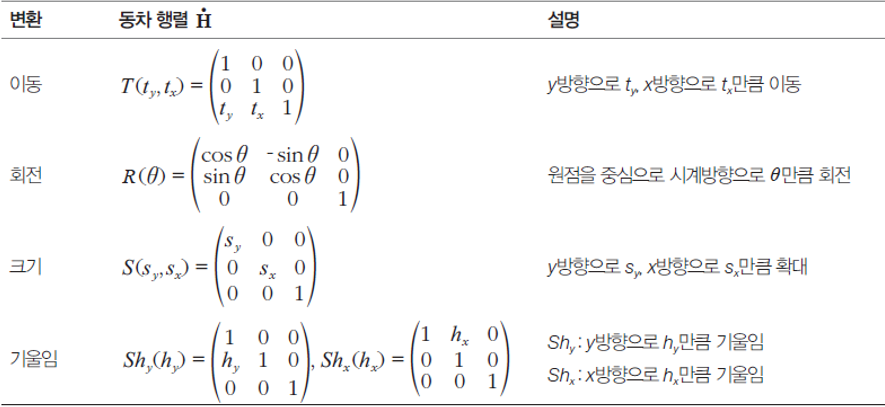

In [39]:
# make transform x->x+15, y->y+30
Tx = 15
Ty = 30

T = np.array([[1, 0, 0], [0, 1, 0], [Ty, Tx, 1]])
#T = [[1, 0, 0], [0, 1, 0], [Ty, Tx, 1]] # Transformation matrix
#T = np.linalg.inv(T)
print(T)

[[ 1  0  0]
 [ 0  1  0]
 [30 15  1]]


In [40]:
# apply transform
iMax, jMax = numpy.shape(image)
iTranslated = 0
while iTranslated < iMax:

    jTranslated = 0
    while jTranslated < jMax:
        pixel_data = image[iTranslated, jTranslated]
        input_coords = np.array([iTranslated, jTranslated, 1])
        i_out, j_out, _ = np.dot(input_coords, T)
        #print(i_out, j_out)
        imageTranslated[i_out, j_out] = pixel_data
        # (T^t)X
        #??  Interpolation

        jTranslated = jTranslated + 1
    iTranslated = iTranslated + 1


# Check result
plt.subplot(1, 2, 1)
plt.imshow(X, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imageTranslated, cmap='gray')
plt.show()


IndexError: index 256 is out of bounds for axis 1 with size 256